In [50]:
import tweepy
import re
import pickle
import os

from tweepy import OAuthHandler
          
#Initializing the keys  #hidden in the environmental variables
consumer_key     = os.getenv('consumer_key')  
consumer_secret  = os.getenv('consumer_secret')
access_token     = os.getenv('access_token')
access_secret    = os.getenv('access_secret')


In [51]:
#authenticating in Twitter

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
args = ['facebook']
api = tweepy.API(auth, timeout = 10)


In [52]:
#fetch results

list_tweets = []

query = args[0]

if len(args) == 1:
    for status in tweepy.Cursor(api.search_tweets, q = query+" -filter:retweets", lang = 'en', result_type = 'recent').items(100):
        list_tweets.append(status.text)

In [53]:
print(list_tweets[0:3])

["@kindlejo_jo I'm going to need more proof and/or research from my Facebook group (the onion supremacists) and I als… https://t.co/gpKPkMF7HN", "It's quite apparent that LinkedIn and Facebook need to change their names, the first, gives a good boost online, of… https://t.co/wB1QkBAwfe", '#businesstips #bitcoin #tumblr #twitter #facebook #instagram #dogecoin #socialmedia #tiktok #doge #deal #gift… https://t.co/nwaDJUFe16']


In [54]:
#Loading vectorizer and model
with open('classifier.pickle', 'rb') as f:
    classifier = pickle.load(f)
with open('vectorizer.pickle', 'rb') as f:
    vectorizer = pickle.load(f)
    
total_pos = 0
total_neg = 0

In [55]:
#preprocessing tweets

for tweet in list_tweets:
    tweet = re.sub(r'^http://t.co/[a-zA-Z0-9]*\s', ' ', tweet)
    tweet = re.sub(r'\s+http://t.co/[a-zA-Z0-9]*\s', ' ', tweet)
    tweet = re.sub(r'\s+http://t.co/[a-zA-Z0-9]*$', ' ', tweet)
    tweet = tweet.lower()
    tweet = re.sub(r"that's", "that is", tweet)
    tweet = re.sub(r"there's", "there is", tweet)
    tweet = re.sub(r"what's", "what is", tweet)
    tweet = re.sub(r"where's", "where is", tweet)
    tweet = re.sub(r"it's", "it is", tweet)
    tweet = re.sub(r"who's", "who is", tweet)
    tweet = re.sub(r"she's", "she is", tweet)
    tweet = re.sub(r"i'm", "i am", tweet)
    tweet = re.sub(r"they're", "they are", tweet)
    tweet = re.sub(r"who're", "who are", tweet)
    tweet = re.sub(r"ain't", "am not", tweet)
    tweet = re.sub(r"wouldn't", "would not", tweet)
    tweet = re.sub(r"shouldn't", "should not", tweet)
    tweet = re.sub(r"couldn't", "could not", tweet)
    tweet = re.sub(r"can't", "can not", tweet)
    tweet = re.sub(r"won't", "will not", tweet)
    tweet = re.sub(r"\W", " ", tweet)
    tweet = re.sub(r"\d", " ", tweet)
    tweet = re.sub(r'\s+[a-z]\s+', ' ', tweet)
    tweet = re.sub(r'\s+[a-z]$', ' ', tweet)
    tweet = re.sub(r'^[a-z]\s+', ' ', tweet)
    tweet = re.sub(r'\s+', ' ', tweet)
    sent = classifier.predict(vectorizer.transform([ tweet]).toarray())
    if sent[0] == 1:
        total_pos += 1
    else:
        total_neg+= 1

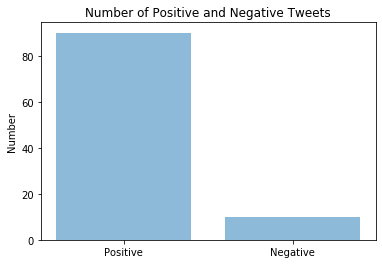

In [56]:
#plotting results
import matplotlib.pyplot as plt
import numpy as np
objects = ['Positive', 'Negative']
y_pos = np.arange(len(objects))

plt.bar(y_pos, [total_pos, total_neg], alpha = 0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Number')
plt.title('Number of Positive and Negative Tweets')

plt.show()